In [1]:
from sklearn.model_selection import KFold
import numpy as np
from matplotlib import pyplot as plt
from model import *

In [2]:
# Load cryptic seq data
seq_length = 46
file_path = 'data/cs_data.csv'
decoy_path = 'data/cs_data.csv'
X, y = read_data(file_path, decoy_path, decoy_mul=0)

# Mask the central dinucleotide from X
X = np.array([seq[:22] + 'NN' + seq[24:] for seq in X])

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results
fold_results = []
all_y_val = []
all_y_val_pred = []

# Perform 5-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    print(f"Fold {fold}")
    
    # Split data into train and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Initialize the model
    input_size = seq_length * 5  # 4 bases + N, one-hot encoded
    hidden_sizes = [128, 64]
    output_size = 1
    model = MLP(input_size, hidden_sizes, output_size)
    
    # Train the model
    train_model(model, X_train, y_train, epochs=50, log=True)
    print(f"Fold {fold} training completed!")
    
    # Evaluate the model on validation set
    y_val_pred = np.array(eval_model(model, X_val))

    # Store y_val and y_val_pred
    all_y_val.extend(y_val)
    all_y_val_pred.extend(y_val_pred)
    
    # Calculate and store the mean squared error for this fold
    mse = np.mean((y_val - y_val_pred) ** 2)
    fold_results.append(mse)
    
    print(f"Fold {fold} MSE: {mse}")

# Convert lists to numpy arrays
all_y_val = np.array(all_y_val)
all_y_val_pred = np.array(all_y_val_pred)

# Print overall results
print("\nCross-validation results:")
for fold, mse in enumerate(fold_results, 1):
    print(f"Fold {fold} MSE: {mse}")
print(f"Average MSE: {np.mean(fold_results)}")
print(f"Standard deviation of MSE: {np.std(fold_results)}")

Fold 1


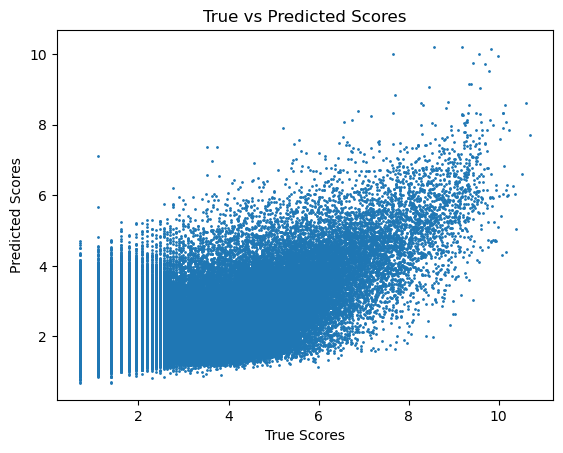

In [5]:
plt.scatter(all_y_val, all_y_val_pred, s=1)
plt.xlabel('True Scores')
plt.ylabel('Predicted Scores')
plt.title('True vs Predicted Scores')
plt.show()